In [121]:
#Importo le librerie di cui avremo bisogno
import numpy as np
import pandas as pd
import seaborn as sns
from my_functions import *
import pickle
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import Ridge
from sklearn.metrics import *
plt.figure(figsize=(20,6))

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

# EDA
## Objective understanding
* L'obiettivo di questa analisi è predire lo sviluppo della malattia dei pazienti che soffrono di diabete basandosi sui dati forniti.


In [122]:
# Importo i dataset
X, y = load_diabetes(return_X_y=True, as_frame=True)
# Divido il dataset in train e test set
X_train, X_test ,y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)
# Resetto l'indice
for df in [X_train, X_test,y_train, y_test]:
    df.reset_index(drop=True,inplace=True,)

In [123]:
# Controllo la forma dei dataframe
print(X_train.shape, X_test.shape ,y_train.shape, y_test.shape)

(397, 10) (45, 10) (397,) (45,)


In [172]:
X_train

,age,sex,bmi,bp,tc,hdl,tch,ltg,glu
0,-0.016412,-0.044642,-0.035307,-0.026328,0.032830,0.100183,-0.039493,-0.070209,-0.079778
1,-0.096328,-0.044642,-0.036385,-0.074528,-0.038720,0.015505,-0.039493,-0.074089,-0.001078
2,0.030811,-0.044642,-0.050396,-0.002228,-0.044223,0.118591,-0.076395,-0.018118,0.003064
3,-0.020045,-0.044642,-0.084886,-0.026328,-0.035968,0.041277,-0.051671,-0.082381,-0.046641
4,-0.060003,-0.044642,0.001339,-0.029771,-0.007073,0.011824,-0.002592,0.031815,-0.054925
...,...,...,...,...,...,...,...,...,...
392,-0.096328,-0.044642,-0.076264,-0.043542,-0.045599,0.008142,-0.039493,-0.059473,-0.083920
393,0.005383,0.050680,0.030440,0.083844,-0.037344,0.015505,-0.039493,0.008640,0.015491
394,0.030811,-0.044642,-0.020218,-0.005671,-0.004321,0.078093,-0.039493,-0.010904,-0.001078
395,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,-0.017629,-0.002592,-0.038459,-0.038357


In [124]:
# Controllo la variabile target
y_train

0       52.0
1      200.0
2       87.0
3       90.0
4      258.0
       ...  
392    134.0
393    202.0
394    148.0
395     64.0
396    302.0
Name: target, Length: 397, dtype: float64

* Ci troviamo in u caso di regressione perchè la previsione che dovremmo fare è basata su dati continui.

## Data understanding & quality evaluaton

Il dataset che ci è stato fornito contiene 10 features in particolare:
* Età dei pazienti.
* Sesso.
* BMI, indice di massa corporea che mette in relazione l'altezza del paziente con il suo peso. In particolare si ottiene dividendo il peso del paziente con il quadrato dell'altezza, il risultato è usato per classificare il soggetto in un'area di peso.
* Bp , pressione sanguigna media.
* Da S1 a S6 sono valori inerenti al siero del sangue in particolare: colesterolo, lipoproteine, trigliceridi e glucosio.


In [125]:
# Rinomino le colonne
for df in [X, X_train, X_test]:
    df.rename(columns={
    "s1": "tc",
    "s2": "ldl",
    "s3": "hdl",
    "s4": "tch",
    "s5": "ltg",
    "s6": "glu"
},inplace=True)

In [171]:
for df in [X_train, X_test]:
    print(f"{df.info()}\n")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 0 to 396
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     396 non-null    float64
 1   sex     396 non-null    float64
 2   bmi     396 non-null    float64
 3   bp      396 non-null    float64
 4   tc      396 non-null    float64
 5   hdl     396 non-null    float64
 6   tch     396 non-null    float64
 7   ltg     396 non-null    float64
 8   glu     396 non-null    float64
dtypes: float64(9)
memory usage: 47.1 KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     45 non-null     float64
 1   sex     45 non-null     float64
 2   bmi     45 non-null     float64
 3   bp      45 non-null     float64
 4   tc      45 non-null     float64
 5   hdl     45 non-null     float64
 6   tch     45 non-null     float64
 7   lt

Come notiamo non sono presenti dati mancanti nelle colonne e il Dtype di esse è numerico.

Siccome ci troviamo in una situazione con dati già scalati e continui è superfluo effettuare il controllo dell'unicità dei dati.

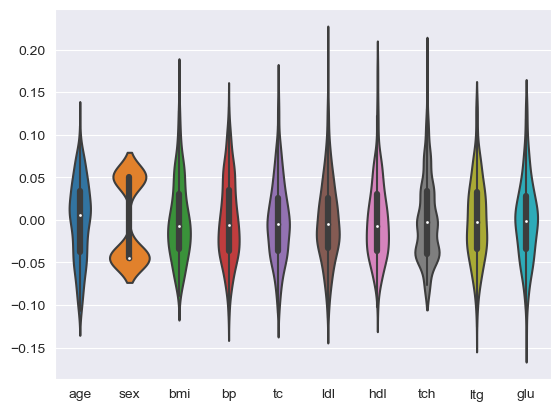

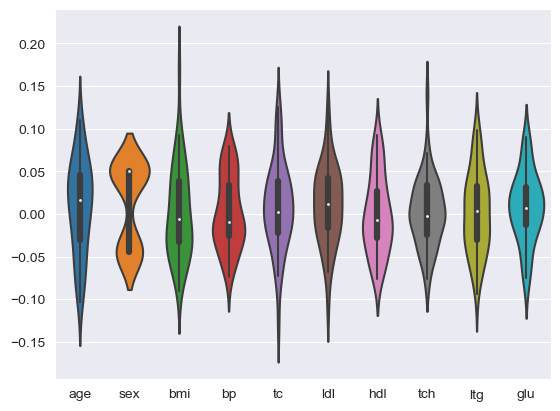

In [127]:
for df in [X_train, X_test]:
    sns.violinplot(data=df)
    plt.show()

Come possiamo osservare dal grafico la colonna "sex" e "tch" sembrano presentare alcuni pattern al loro interno.

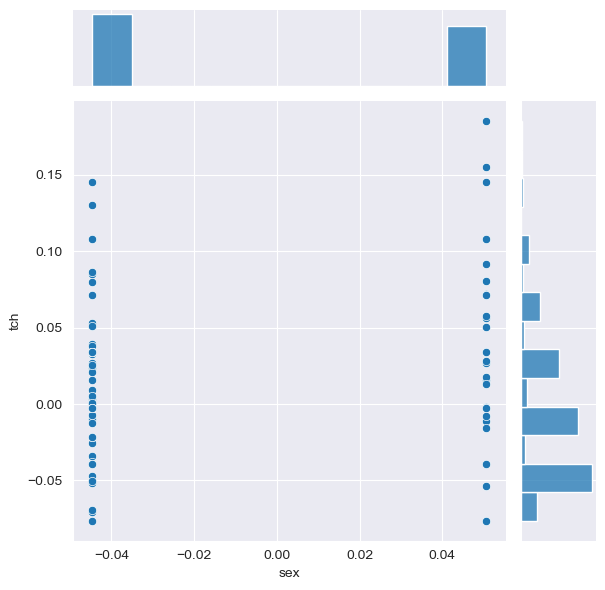

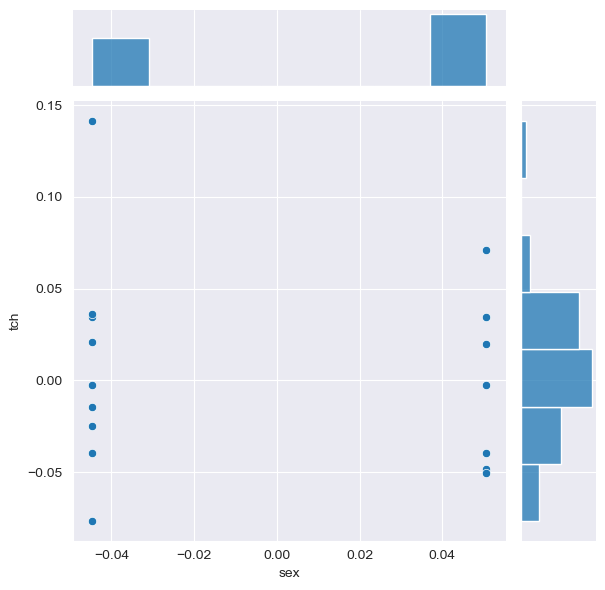

In [128]:
for df in [X_train, X_test]:
    sns.jointplot(data=df,x="sex",y="tch")

Sull'asse delle X è rappresentata la feature "sex" che come possiamo notare presenta solo 2 valori, uno che rappresenta le donne e uno gli uomini, mentre sull'asse delle Y sono rappresentati i valori di TCH e i dati sono distribuiti per intervalli.

## Outliers
A questo punto verrà condotto uno studio sugli outliers del dataset di trai e nel caso in cui siano troppo estremi verranno rimossi.

Questo passagio è utile perchè eliminando i dati troppo diversi rispetto al resto del dataset si potrebbero ottenere delle stime più accurate tramite il modello predittivo.

Siccome non ci troviamo in un caso in cui bisogna prestare particolare attenzione agli outliers (es anomaly detection) si può procedere alla loro rimozione.

<AxesSubplot:>

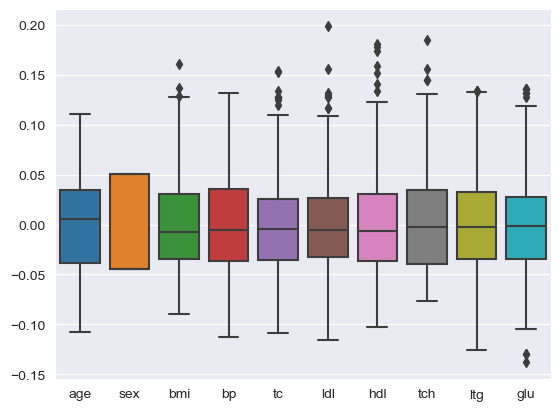

In [129]:
original_len = X_train.shape[0]
sns.boxplot(data=X_train)

<AxesSubplot:>

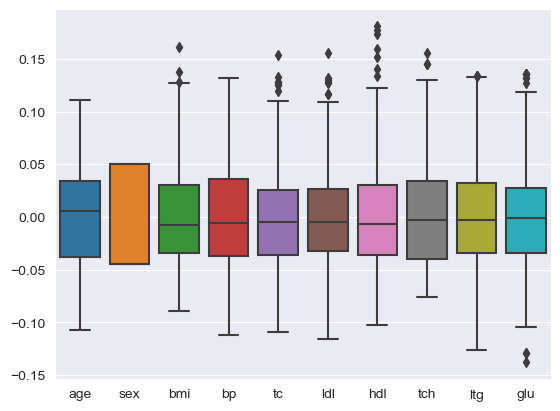

In [130]:
neighbors = 30
lof = LocalOutlierFactor(n_neighbors=neighbors,n_jobs=-1)
outliers = lof.fit_predict(X_train,y_train)
mask = outliers != -1
X_train, y_train = X_train[mask], y_train[mask]
sns.boxplot(data=X_train)

In [131]:
print("Outliers rimossi:",original_len - X_train.shape[0])

Outliers rimossi: 1


## Correlation

In [132]:
df = pd.merge(X_train,y_train,right_index=True,left_index=True)
df = df.corr()
df.drop(index=X_train.columns.unique(),columns="target",inplace=True)
df

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu
target,0.188683,0.024051,0.586154,0.441012,0.221563,0.185573,-0.392983,0.440472,0.558195,0.389988


<AxesSubplot:>

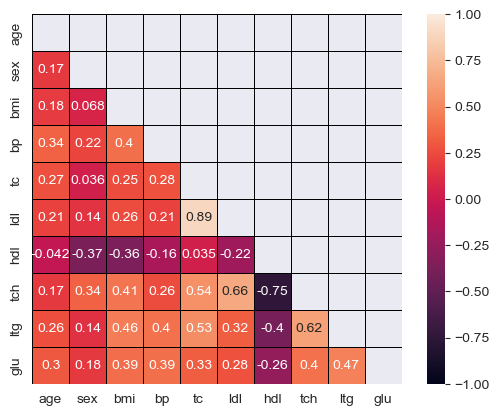

In [133]:
mask = np.triu(np.ones_like(X_train.corr(), dtype=bool))
sns.heatmap(data=X_train.corr(),square=True,annot=True,linecolor="black",linewidths=0.5,vmax=1,vmin=-1,fmt="0.2",mask=mask)

Come possiamo notare "ldl" e "tc" presentano un alto livello di correlazione quindi si può considerare di rimuovere tra le due quella colonna che ha un minor valore di correlazione con la colonna target. 

Questo perchè essendo "ldl" e "tc" fortemente correlate avere entrambi nel modello risulterebbe superfluo.

<AxesSubplot:>

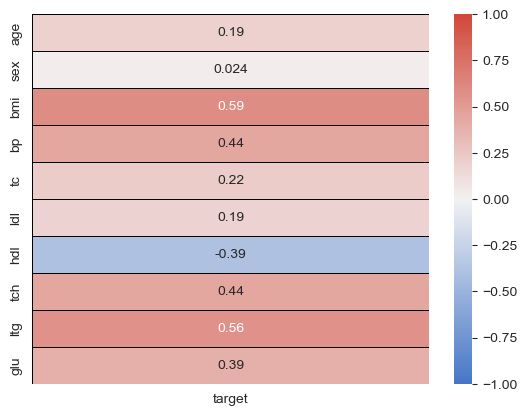

In [134]:
cmap = sns.diverging_palette(254, 15, as_cmap=True)
sns.heatmap(data=df.T,square=False,annot=True,linecolor="black",linewidths=0.5,vmax=1,vmin=-1,fmt="0.2",cmap=cmap)

La colonna che ha il minor valore di correlazione e perciò sarà rimossa.

In [135]:
# Condizione che decide quale colonna rimuovere
if df["tc"].values[0] > df["ldl"].values[0]:
    col_to_drop = "ldl"
else:
    col_to_drop = "tc"

In [136]:
print(col_to_drop)

ldl


In [137]:
# Rimuovo la colonna sia dal train che test set
for df in [X_train,X_test]:
    df.drop(columns=col_to_drop,inplace=True)

## Feature Selection
Metto a confronto gli scatter plot tra il dataset con tutte le features e uno in cui seleziono solo le 4 migliori.

In [138]:
# Uso la f.ne selectKBest di sklearn con la scoring function Anova per selezionare le features + importanti
remove_col = sorted(SelectKBest(f_classif, k=4).fit(X_train,y_train).get_feature_names_out())
# Applico il filtro ai dataframe originari
X_train_new = X_train[remove_col]
X_test_new = X_test[remove_col]

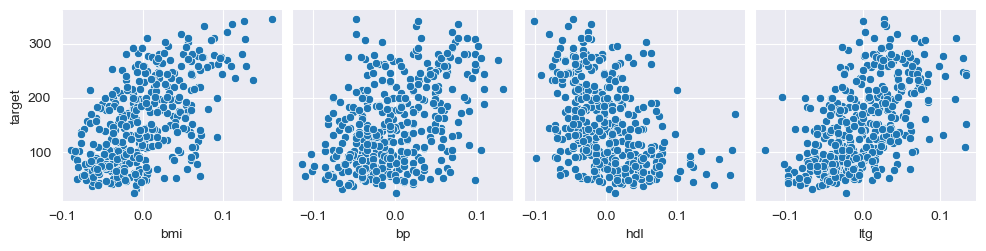

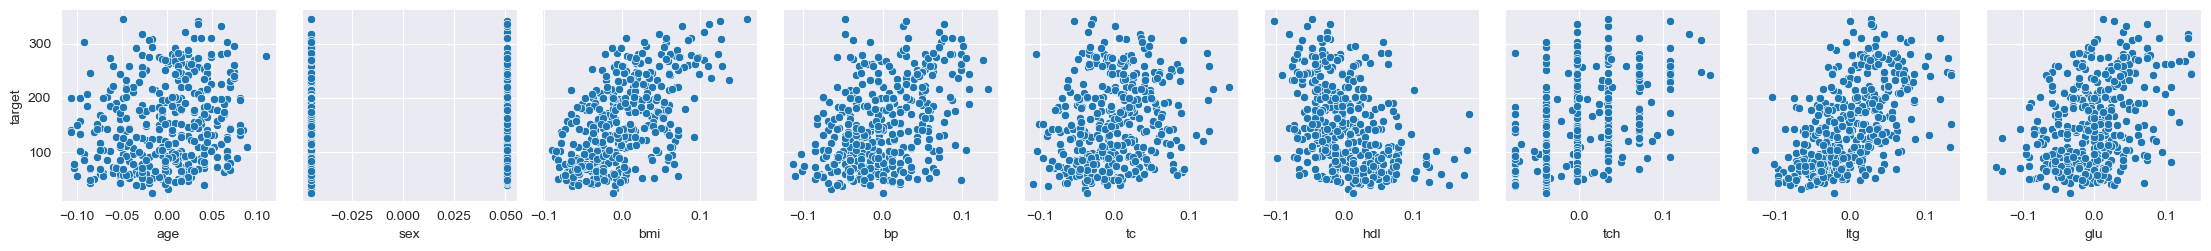

In [139]:
for df in [X_train_new,X_train]:
    pair = pd.merge(df,y_train,right_index=True,left_index=True)
    sns.pairplot(data=pair,x_vars=pair.drop(columns="target").columns,y_vars="target")
    plt.show()

Come possiamo notare, in particolare nel primo grafico (quello con 4 feature) è presente una relazione tra le varie features e la colonna target.

# Metrics
Le metriche che osserveremo e su cui faremo delle considerazioni sono:
* R2, indice che misura il legame tra la variabilità dei dati e la correttezza del modello utilizzato.

* MAE , è una misura degli errori tra osservazioni appaiate che esprimono lo stesso fenomeno.

# Model definition, training, hyperparameters tuning

In [166]:
ridge = Ridge()
start = 0
end = 0.5
param = {"alpha":np.arange(start,end,0.0025)}

In [167]:
gs_results = []
for df in [X_train_new,X_train]:
    gs = GridSearchCV(estimator=ridge,
                  param_grid=param,
                  scoring="r2",
                  refit=True,
                  return_train_score=True,
                  cv=10,
                  n_jobs=-1)
    trained_model = gs.fit(df,y_train)
    report = pd.DataFrame(trained_model.cv_results_)
    col_to_keep = ["param_alpha","mean_test_score","mean_train_score"]
    report = report[col_to_keep]
    gs_results.append([trained_model,report])

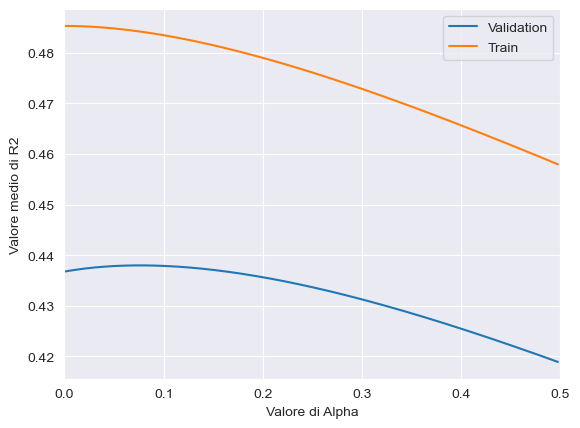

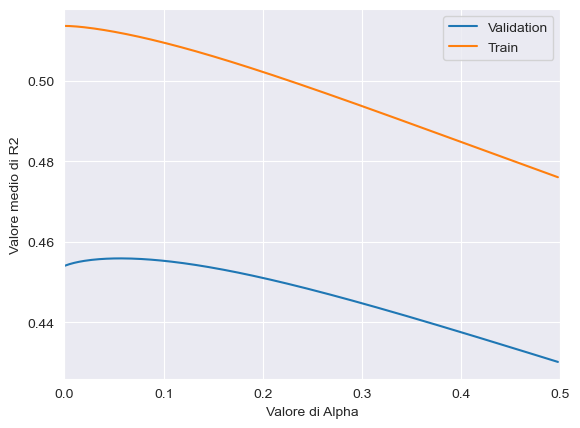

In [168]:
for reports in gs_results:
    plt.xlim(start,end)
    plot(reports[1],"param_alpha","mean_test_score","mean_train_score","blue","orange",["Validation","Train"],"Valore di Alpha","Valore medio di R2")

In questo grafico possiamo vedere le performance del modello predittivo sui due diversi dataset.

In particolare possiavo vedere come varia il valore medio di R2 al variare del parametro Alpha.

In [169]:
for reports in gs_results:
    print("Punteggio R2 su Validation set:",reports[0].best_score_.round(3))

Punteggio R2 su Validation set: 0.438
Punteggio R2 su Validation set: 0.456


Il modello allenato su tutte le feature performa meglio sul validation set rispetto al dataframe di 4 feature.

Questo risultato però non ci fornisce particolari informazioni riguardo le prestazioni dei modelli rispetto al test set.

Risultati con poche features: Ridge(alpha=0.075) 0.571 41.612


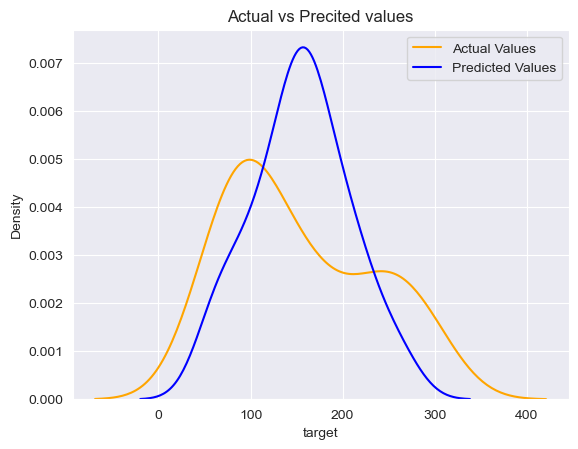

Risultati con tutte le features: Ridge(alpha=0.0575) 0.553 41.742


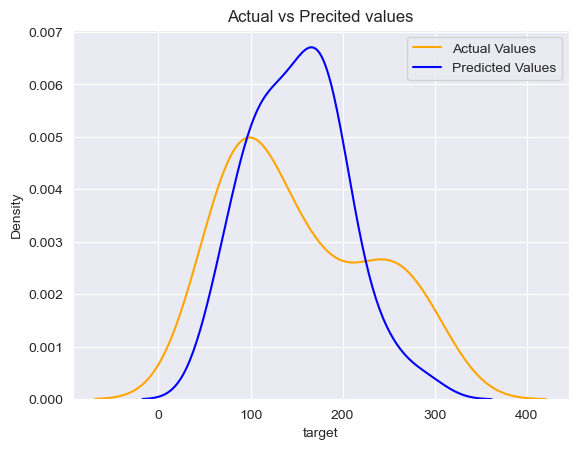

In [170]:
for estimator in gs_results:
    if estimator[0] == gs_results[0][0]:
        y_pred = estimator[0].best_estimator_.predict(X_test_new)
        name = "Risultati con poche features:"
    else:
        y_pred = estimator[0].best_estimator_.predict(X_test)
        name = "Risultati con tutte le features:"
    r2 = r2_score(y_test,y_pred).round(3) 
    mae = mean_absolute_error(y_test,y_pred).round(3)
    print(name,estimator[0].best_estimator_,r2,mae)
    plot_kde(y_test,y_pred)

# Conclusioni
Il modello predittivo allenato sul dataframe con solo 4 features riesci a generalizzare meglio rispetto al dataframe con tutte e 9 le features.

Questo però non è abbastanza per rendere il modello utilizzato adatto a questo tipo di problema, siccome in entrambi i casi si è ottenuto un punteggio di R2 e MAE non ottimi.

Infatti R2 non supera il valore di 0.6 mentre il MAE è addastanza alto.

Questo ci indica che per risolvere questo problema di regressione sarà necessario un'altro modello.